# Caso Práctico: Clasificación de sentimientos

## Conjunto de datos

Este es un conjunto de datos está formado por 25.000 críticas de películas del IMDB (Internet Movie Database), etiquetadas por sentimiento (positivo/negativo). Las reseñas han sido preprocesadas, y cada reseña está codificada como una lista de índices de palabras (números enteros). Para mayor comodidad, las palabras se indexan por frecuencia general en el conjunto de datos, de modo que, por ejemplo, el número entero "3" codifica la tercera palabra más frecuente en los datos. Esto permite realizar operaciones de filtrado rápido como considerar sólo las 10.000 palabras más comunes.

## 1. Cargando el conjunto de datos

In [1]:
from tensorflow.keras.datasets import imdb

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

17464789/17464789 [==============================] - 3s 0us/step


El argumento _num_words_ indica que únicamente tendremos en cuenta las 10.000 palabras más frecuentes del conjunto de datos. Por lo tanto, el resto de palabras que sean poco frecuentes, serán descartadas y no formarán parte de las reseñas con las que entrenaremos y probaremos el algoritmo.

Tanto _train_data_ como _test_data_ se corresponden con una lista de reseñas. Cada una de las reseñas se corresponde con una lista de números enteros que representan el índice de una palabra. Para conocer que índice tiene cada palabra, podemos llamar al método _get_word_index()_

In [3]:
# Indices de las palabras
word_index = imdb.get_word_index()
word_index

1641221/1641221 [==============================] - 1s 0us/step


{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [4]:
# Primera reseña del conjunto de datos de entrenamiento
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


Es importante tener en cuenta que a la hora de visualizar las reseñas debemos aplicar un offset de -3 debido a que el número 0, 1 y 2 están reservados para "padding", "start of sequence" y "unknown" respectivamente.

In [5]:
# Decodificando la reseña utilizando los índices de las palabras
reversed_word_index = {v : k for k, v in word_index.items()}
' '.join([reversed_word_index.get(i - 3, "({})".format(i)) for i in train_data[0]])

"(1) this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert (2) is an amazing actor and now the same being director (2) father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for (2) and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also (2) to the two little boy's that played the (2) of norman and paul they were just brilliant children are often left out of the (2) list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have don

Las variables _train_labels_ y _test_labels_ se corresponden con una lista de valores que puede ser 1, si la reseña es positiva, o 0, si la reseña es negativa

In [6]:
# La reseña anterior corresponde a una reseña positiva
print(train_labels[0])

1


# 2. Preprocesamiento del conjunto de datos

A pesar de que ya tenemos codificadas las reseñas para que esten representadas por valores numéricos en lugar de por cadenas de texto, existen algunos factores que no permiten que sean conjuntos de datos apropiados para proporcionarle a una red neuronal artifical.

Una de las limitaciones fundamentales es que cada reseña tiene un número diferente de palabras.

In [7]:
import numpy as np

# Vectorizamos las reseñas convirtiendolas en vectores de 10.000 valores de 1s y 0s

def vectorize(seqs, dim = 10000):
    results = np.zeros((len(seqs), dim))
    for i, seq in enumerate(seqs):
        results[i, seq] = 1.
    return results

In [8]:
# Para que lo anterior funcione se basa en la siguiente propiedad
a = np.zeros(15)
print("Array original:\t\t", a)
a[[0,3,5,7,9]] = 1.
print("Array modificado:\t", a)

Array original:		 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Array modificado:	 [1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0.]


Vectorizamos tanto el conjunto de datos de entrenamiento, como el conjunto de datos de pruebas

In [9]:
# Vectorizamos el conjunto de datos de entrenamiento y el de pruebas
X_train = vectorize(train_data, 10000)
X_test = vectorize(test_data, 10000)

In [10]:
# Cada una de las reseñaas se corresponde con un vector formado por 1s y 0s
print("Valores originales:\t", train_data[0][:15])
print("Valores vectorizados:\t", X_train[0][:15])

Valores originales:	 [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4]
Valores vectorizados:	 [0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1.]


# 3. División del conjunto de datos

In [12]:
from sklearn.model_selection import train_test_split

X_test, X_val, Y_test, Y_val = train_test_split(X_test, test_labels, test_size = 0.5)

In [13]:
Y_train = train_labels

In [14]:
print("Longitud subconjunto entrenamiento: ", len(X_train))
print("Longitud subconjunto validación: ", len(X_val))
print("Longitud subconjunto pruebas: ", len(X_test))

Longitud subconjunto entrenamiento:  25000
Longitud subconjunto validación:  12500
Longitud subconjunto pruebas:  12500


# 4. Construcción de la red neuronal artificial tipo 1 

In [15]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation = 'tanh', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'tanh'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [17]:
from tensorflow.keras import optimizers

model.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['accuracy', 'Precision']) 
# En optimizer si utilizas 'sgd' el learning rate por default es 0.01

In [18]:
history = model.fit(X_train, Y_train, epochs = 40, validation_data = (X_val, Y_val))

Epoch 1/40
782/782 [==============================] - 7s 8ms/step - loss: 0.4876 - accuracy: 0.7917 - precision: 0.7892 - val_loss: 0.3689 - val_accuracy: 0.8494 - val_precision: 0.8640
Epoch 2/40
782/782 [==============================] - 5s 6ms/step - loss: 0.3172 - accuracy: 0.8703 - precision: 0.8640 - val_loss: 0.3242 - val_accuracy: 0.8624 - val_precision: 0.9040
Epoch 3/40
782/782 [==============================] - 5s 6ms/step - loss: 0.2659 - accuracy: 0.8938 - precision: 0.8889 - val_loss: 0.3787 - val_accuracy: 0.8344 - val_precision: 0.9419
Epoch 4/40
782/782 [==============================] - 6s 8ms/step - loss: 0.2395 - accuracy: 0.9062 - precision: 0.9027 - val_loss: 0.2942 - val_accuracy: 0.8787 - val_precision: 0.8486
Epoch 5/40
782/782 [==============================] - 7s 9ms/step - loss: 0.2189 - accuracy: 0.9162 - precision: 0.9121 - val_loss: 0.2889 - val_accuracy: 0.8810 - val_precision: 0.8891
Epoch 6/40
782/782 [==============================] - 6s 8ms/step - lo

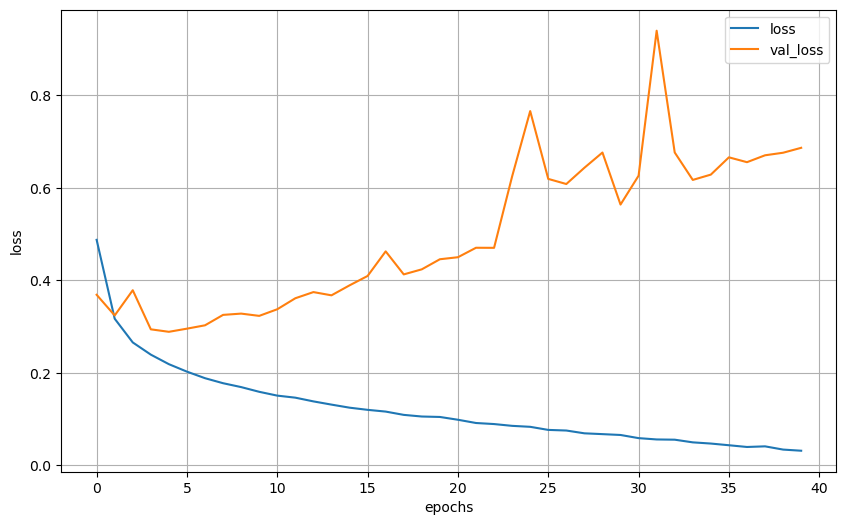

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history)[['loss', 'val_loss']].plot(figsize=(10, 6))
plt.grid(True)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

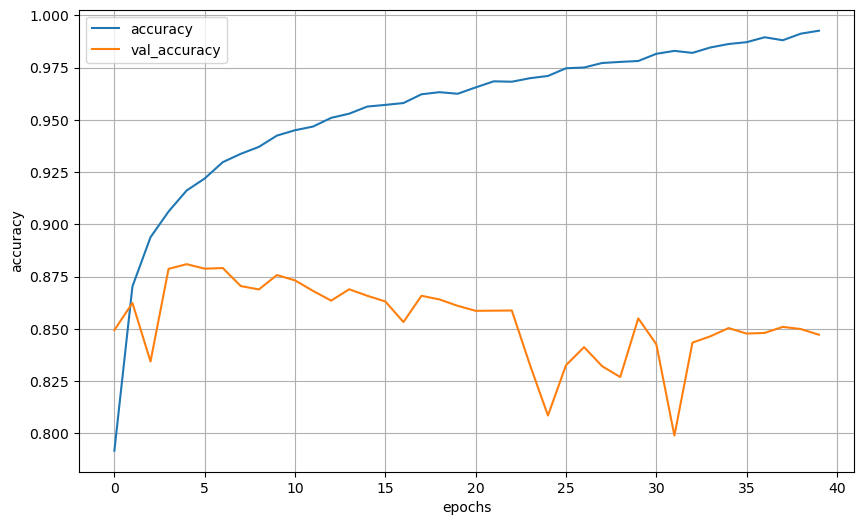

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot(figsize=(10, 6))
plt.grid(True)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.show()


Si analizamos las gráficas podemos determinar que tenemos un problema relacionado al learning rate, tenemos mucho ruido

# 4. Construcción de la red neuronal artificial tipo 2

In [21]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation = 'tanh', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'tanh'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [22]:
from tensorflow.keras import optimizers

model.compile(optimizer = optimizers.SGD(learning_rate = 0.001), loss = 'binary_crossentropy', metrics = ['accuracy', 'Precision']) 
# En optimizer si utilizas 'sgd' el learning rate por default es 0.01

In [23]:
history = model.fit(X_train, Y_train, epochs = 40, validation_data = (X_val, Y_val))

Epoch 1/40
782/782 [==============================] - 12s 12ms/step - loss: 0.6679 - accuracy: 0.6191 - precision: 0.6306 - val_loss: 0.6429 - val_accuracy: 0.6958 - val_precision: 0.7047
Epoch 2/40
782/782 [==============================] - 9s 11ms/step - loss: 0.6126 - accuracy: 0.7422 - precision: 0.7409 - val_loss: 0.5914 - val_accuracy: 0.7586 - val_precision: 0.7640
Epoch 3/40
782/782 [==============================] - 9s 12ms/step - loss: 0.5591 - accuracy: 0.7854 - precision: 0.7782 - val_loss: 0.5417 - val_accuracy: 0.7872 - val_precision: 0.7891
Epoch 4/40
782/782 [==============================] - 8s 11ms/step - loss: 0.5092 - accuracy: 0.8089 - precision: 0.8009 - val_loss: 0.4972 - val_accuracy: 0.8046 - val_precision: 0.7968
Epoch 5/40
782/782 [==============================] - 8s 10ms/step - loss: 0.4663 - accuracy: 0.8234 - precision: 0.8137 - val_loss: 0.4605 - val_accuracy: 0.8163 - val_precision: 0.7970
Epoch 6/40
782/782 [==============================] - 9s 12ms/st

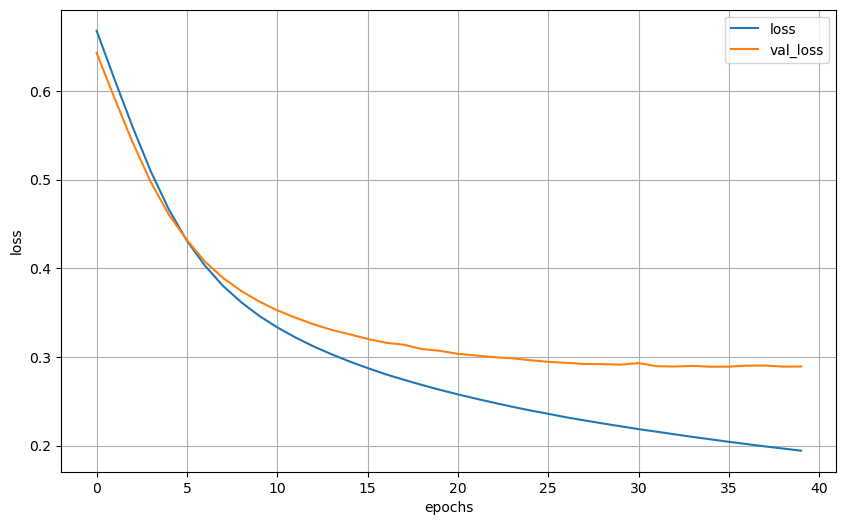

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history)[['loss', 'val_loss']].plot(figsize=(10, 6))
plt.grid(True)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

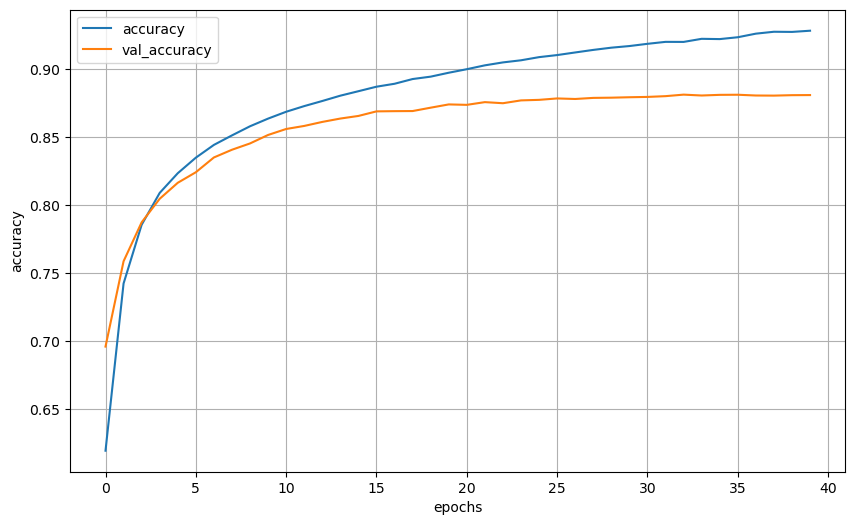

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot(figsize=(10, 6))
plt.grid(True)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.show()


### 4.1 Evaluación con el subconjunto de pruebas

In [26]:
test_loss, test_acc, test_prec = model.evaluate(X_test, Y_test)

391/391 [==============================] - 1s 3ms/step - loss: 0.2825 - accuracy: 0.8822 - precision: 0.8835


In [27]:
print('test_acc:', test_acc)
print('test_prec:', test_prec)

test_acc: 0.8822399973869324
test_prec: 0.8835105299949646


# 5. Otros preprocesamientos del conjunto de datos

**Cargando el conjunto de datos**

In [28]:
from tensorflow.keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

In [31]:
# Indices de las palabras
word_index = imdb.get_word_index()

In [32]:
# Decodicficando la reseña utilizando los indices de las palabras de manera más eficientes
reversed_word_index = {v: k for k, v in word_index.items()}

" ".join([reversed_word_index.get(i - 3, "({})".format(i)) for i in train_data[0]])

"(1) this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert (2) is an amazing actor and now the same being director (2) father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for (2) and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also (2) to the two little boy's that played the (2) of norman and paul they were just brilliant children are often left out of the (2) list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have don

In [35]:
train_data[0] # vemos que es un vector de datos

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

# Preparación del conjunto de datos

In [36]:
X_train_prep = []
X_test_prep = []

In [37]:
# Preprocesando el conjunto de datos de entrenamiento
for review in train_data:
    X_train_prep.append(" ".join([reversed_word_index.get(i - 3, "") for i in review]))

In [39]:
X_train_prep[0] # reseña en forma de texto, tiene palabras que se encuentran entre las 10mil mas repetidas en forma de texto

" this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert  is an amazing actor and now the same being director  father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for  and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also  to the two little boy's that played the  of norman and paul they were just brilliant children are often left out of the  list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you think the

In [40]:
# Preprocesando el conjunto de datos pruebas

for review in test_data:
    X_test_prep.append(" ".join([reversed_word_index.get(i - 3, "") for i in review]))

In [41]:
X_test_prep[0]

" please give this one a miss br br   and the rest of the cast rendered terrible performances the show is flat flat flat br br i don't know how michael madison could have allowed this one on his plate he almost seemed to know this wasn't going to work out and his performance was quite  so all you madison fans give this a miss"

In [44]:
Y_train = train_labels
Y_test = test_labels

## División del conjunto de datos

Lo ideal es aplicar la división del conjunto de datos antes de realizar ningún preprocesamiento para que no se infiera ningún tipo de tendencia como consecuencia de la transformación.

In [56]:
from sklearn.model_selection import train_test_split

X_test_prep, X_val_prep, Y_test, Y_val = train_test_split(X_test_prep, Y_test, test_size=0.5)

In [57]:
print("Longitud subconjunto entrenamiento: ", len(X_train_prep))
print("Longitud subconjunto validación: ", len(X_val_prep))
print("Longitud subconjunto pruebas: ", len(X_test_prep))

Longitud subconjunto entrenamiento:  25000
Longitud subconjunto validación:  6250
Longitud subconjunto pruebas:  6250


In [48]:
X_val_prep[10]

" aside from the fact that this movie was filmed mostly in ma which is a beautiful town where my mother once rented a small  and i spent many a pleasant summer as a child it is fun and cute little film br br i must admit that i had no desire to actually see this movie even though i have a for romantic comedies i don't know why the trailers i saw were not appealing the cast did not look that interesting and i had no idea what the plot would be about in the end i found it to be an interesting  on relationships and family i thoroughly enjoyed myself and must admit that i thought that this film was one of the most overlooked gems of last year i am disappointed that so few people seemed to have enjoyed the very human  that this movie presented the viewer with br br i have read many bad reviews of this film and must admit a certain level of shock at the cynicism that is prevalent in them as a  student i consider myself to be quite cynical but this was a beautiful little film that deserves mu

## Vectorización del conjunto de datos


In [58]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train_prep)

In [54]:
X_train = X_train.toarray()

In [66]:
import pandas as pd

pd.DataFrame(X_train, columns=vectorizer.get_feature_names_out()) # get_feature_names() se actualizo a --> get_feature_names_out()

,00,000,10,100,1000,101,11,12,13,13th,...,zhang,zizek,zodiac,zombi,zombie,zombies,zone,zoom,zorro,zu
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
X_test = vectorizer.transform(X_test_prep) # los test solo llevan el transform, no el fit
X_test = X_test.toarray()

In [68]:
X_val = vectorizer.transform(X_val_prep)
X_val = X_val.toarray()

**Entrenamiento de la red neuronal artificial**

In [69]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [71]:
from tensorflow.keras import optimizers

model.compile(optimizer = optimizers.SGD(learning_rate = 0.0005), loss = 'binary_crossentropy', metrics = ['accuracy', 'Precision'])

In [76]:
history = model.fit(X_train, Y_train, epochs = 10, validation_data = (X_val, Y_val))
# Epochs iniciales eran 30, añadimos 10 más para un total de 40. Recordemos que se reentrena sobre los parametros obtenidos en el primer entrenamiento

Epoch 1/10
782/782 [==============================] - 5s 6ms/step - loss: 0.3086 - accuracy: 0.8809 - precision: 0.8738 - val_loss: 0.3379 - val_accuracy: 0.8626 - val_precision: 0.8668
Epoch 2/10
782/782 [==============================] - 6s 7ms/step - loss: 0.3048 - accuracy: 0.8824 - precision: 0.8754 - val_loss: 0.3397 - val_accuracy: 0.8646 - val_precision: 0.8804
Epoch 3/10
782/782 [==============================] - 5s 7ms/step - loss: 0.3009 - accuracy: 0.8842 - precision: 0.8776 - val_loss: 0.3375 - val_accuracy: 0.8645 - val_precision: 0.8806
Epoch 4/10
782/782 [==============================] - 5s 6ms/step - loss: 0.2977 - accuracy: 0.8854 - precision: 0.8793 - val_loss: 0.3337 - val_accuracy: 0.8656 - val_precision: 0.8766
Epoch 5/10
782/782 [==============================] - 6s 8ms/step - loss: 0.2941 - accuracy: 0.8861 - precision: 0.8790 - val_loss: 0.3328 - val_accuracy: 0.8674 - val_precision: 0.8362
Epoch 6/10
782/782 [==============================] - 5s 7ms/step - lo

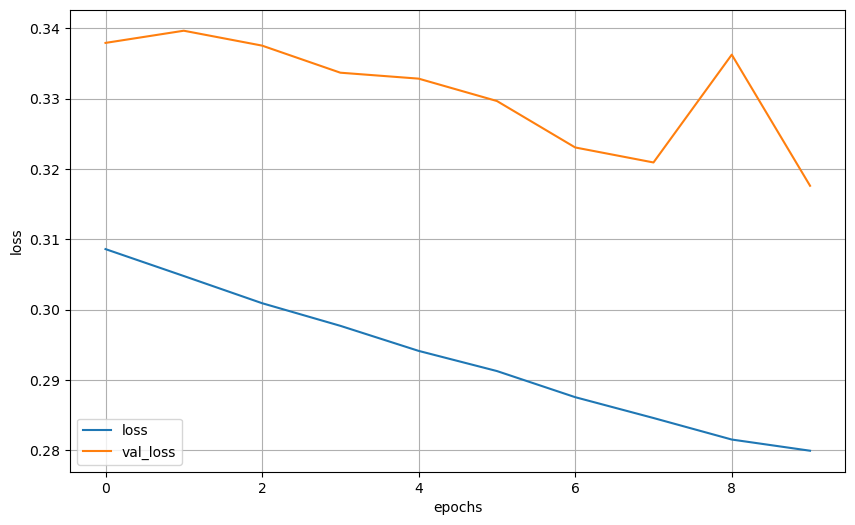

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history)[['loss', 'val_loss']].plot(figsize=(10,6))
plt.grid(True)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

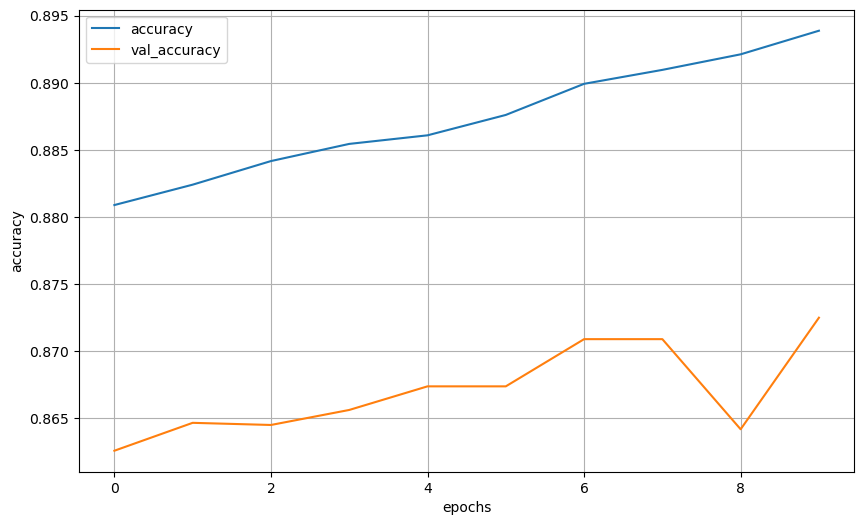

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot(figsize=(10,6))
plt.grid(True)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.show()

# Evaluación con el subconjunto de pruebas

In [79]:
test_loss, test_acc, test_prec = model.evaluate(X_test, Y_test)

196/196 [==============================] - 2s 8ms/step - loss: 0.3145 - accuracy: 0.8699 - precision: 0.8626


In [80]:
print("test_acc:", test_acc)
print("test_prec", test_prec)

test_acc: 0.869920015335083
test_prec 0.8626168370246887
